In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import pandas_profiling as pp  
%matplotlib inline

In [2]:
df_forex = pd.read_csv('Foreign_Exchange_Rates.csv')


In [3]:
df_forex.head(6)

,Unnamed: 0,Time Serie,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,...,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
0,0,2000-01-03,1.5172,0.9847,1.9033,0.6146,1.805,1.4465,8.2798,7.7765,...,1.6563,7.329,101.7,3.8,7.964,8.443,72.3,1.5808,31.38,36.97
1,1,2000-01-04,1.5239,0.97,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,...,1.6535,7.218,103.09,3.8,7.934,8.36,72.65,1.5565,30.6,37.13
2,2,2000-01-05,1.5267,0.9676,1.9339,0.6092,1.856,1.4518,8.2798,7.778,...,1.656,7.208,103.77,3.8,7.935,8.353,72.95,1.5526,30.8,37.1
3,3,2000-01-06,1.5291,0.9686,1.9436,0.607,1.84,1.4571,8.2797,7.7785,...,1.6655,7.2125,105.19,3.8,7.94,8.3675,72.95,1.554,31.75,37.62
4,4,2000-01-07,1.5272,0.9714,1.938,0.6104,1.831,1.4505,8.2794,7.7783,...,1.6625,7.2285,105.17,3.8,7.966,8.415,73.15,1.5623,30.85,37.3
5,5,2000-01-10,1.5242,0.9754,1.935,0.6107,1.819,1.4568,8.2794,7.7785,...,1.6618,7.254,105.28,3.8,8.024,8.449,73.3,1.5704,30.83,37.27


In [4]:
df_forex.isnull().sum()

Unnamed: 0                                   0
Time Serie                                   0
AUSTRALIA - AUSTRALIAN DOLLAR/US$            0
EURO AREA - EURO/US$                         0
NEW ZEALAND - NEW ZELAND DOLLAR/US$          0
UNITED KINGDOM - UNITED KINGDOM POUND/US$    0
BRAZIL - REAL/US$                            0
CANADA - CANADIAN DOLLAR/US$                 0
CHINA - YUAN/US$                             0
HONG KONG - HONG KONG DOLLAR/US$             0
INDIA - INDIAN RUPEE/US$                     0
KOREA - WON/US$                              0
MEXICO - MEXICAN PESO/US$                    0
SOUTH AFRICA - RAND/US$                      0
SINGAPORE - SINGAPORE DOLLAR/US$             0
DENMARK - DANISH KRONE/US$                   0
JAPAN - YEN/US$                              0
MALAYSIA - RINGGIT/US$                       0
NORWAY - NORWEGIAN KRONE/US$                 0
SWEDEN - KRONA/US$                           0
SRI LANKA - SRI LANKAN RUPEE/US$             0
SWITZERLAND -

In [5]:
df_forex = df_forex.replace('ND', np.nan)

In [6]:
df_forex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5217 entries, 0 to 5216
Data columns (total 24 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Unnamed: 0                                 5217 non-null   int64 
 1   Time Serie                                 5217 non-null   object
 2   AUSTRALIA - AUSTRALIAN DOLLAR/US$          5019 non-null   object
 3   EURO AREA - EURO/US$                       5019 non-null   object
 4   NEW ZEALAND - NEW ZELAND DOLLAR/US$        5019 non-null   object
 5   UNITED KINGDOM - UNITED KINGDOM POUND/US$  5019 non-null   object
 6   BRAZIL - REAL/US$                          5019 non-null   object
 7   CANADA - CANADIAN DOLLAR/US$               5019 non-null   object
 8   CHINA - YUAN/US$                           5020 non-null   object
 9   HONG KONG - HONG KONG DOLLAR/US$           5019 non-null   object
 10  INDIA - INDIAN RUPEE/US$            

In [7]:
c = df_forex.columns
d = [i for i in c if i not in ['Unnamed: 0', 'Time Serie']]
for u in d:
    df_forex[u] = pd.to_numeric(df_forex[u])
    
    
df_forex['Time Serie'] = pd.to_datetime(df_forex['Time Serie'], format = '%Y-%m-%d' )

In [8]:
df_forex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5217 entries, 0 to 5216
Data columns (total 24 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Unnamed: 0                                 5217 non-null   int64         
 1   Time Serie                                 5217 non-null   datetime64[ns]
 2   AUSTRALIA - AUSTRALIAN DOLLAR/US$          5019 non-null   float64       
 3   EURO AREA - EURO/US$                       5019 non-null   float64       
 4   NEW ZEALAND - NEW ZELAND DOLLAR/US$        5019 non-null   float64       
 5   UNITED KINGDOM - UNITED KINGDOM POUND/US$  5019 non-null   float64       
 6   BRAZIL - REAL/US$                          5019 non-null   float64       
 7   CANADA - CANADIAN DOLLAR/US$               5019 non-null   float64       
 8   CHINA - YUAN/US$                           5020 non-null   float64       
 9   HONG KONG - HONG KO

In [9]:
df_forex =  df_forex.drop('Unnamed: 0', axis=1)
    

In [10]:
df_forex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5217 entries, 0 to 5216
Data columns (total 23 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Time Serie                                 5217 non-null   datetime64[ns]
 1   AUSTRALIA - AUSTRALIAN DOLLAR/US$          5019 non-null   float64       
 2   EURO AREA - EURO/US$                       5019 non-null   float64       
 3   NEW ZEALAND - NEW ZELAND DOLLAR/US$        5019 non-null   float64       
 4   UNITED KINGDOM - UNITED KINGDOM POUND/US$  5019 non-null   float64       
 5   BRAZIL - REAL/US$                          5019 non-null   float64       
 6   CANADA - CANADIAN DOLLAR/US$               5019 non-null   float64       
 7   CHINA - YUAN/US$                           5020 non-null   float64       
 8   HONG KONG - HONG KONG DOLLAR/US$           5019 non-null   float64       
 9   INDIA - INDIAN RUPE

profile =  pp.ProfileReport(df_forex) 

profile.to_file("Forex_output.html")

In [14]:
#generate features

# time features
df_forex['date'] = pd.to_datetime(df_forex['Time Serie'])
df_forex['year'] = df_forex['date'].dt.year
df_forex['month'] = df_forex['date'].dt.month
df_forex['week'] = df_forex['date'].dt.week
df_forex['day'] = df_forex['date'].dt.day


C:\Users\USER\3D Objects\Anaconda3\envs\webscraping\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  import sys


In [15]:
df_forex.rename(columns={
    'AUSTRALIA - AUSTRALIAN DOLLAR/US$':            'AUD',
    'EURO AREA - EURO/US$':                         'EUR',
    'NEW ZEALAND - NEW ZELAND DOLLAR/US$':          'NZD',
    'UNITED KINGDOM - UNITED KINGDOM POUND/US$':    'GBP',
    'BRAZIL - REAL/US$':                            'BRL',
    'CANADA - CANADIAN DOLLAR/US$':                 'CAD',
    'CHINA - YUAN/US$':                             'CNY',
    'HONG KONG - HONG KONG DOLLAR/US$':             'HKD',
    'INDIA - INDIAN RUPEE/US$':                     'INR',
    'KOREA - WON/US$':                              'KRW',
    'MEXICO - MEXICAN PESO/US$':                    'MXN',
    'SOUTH AFRICA - RAND/US$':                      'ZAR',
    'SINGAPORE - SINGAPORE DOLLAR/US$':             'SGD',
    'DENMARK - DANISH KRONE/US$':                   'DKK',
    'JAPAN - YEN/US$':                              'JPY',
    'MALAYSIA - RINGGIT/US$':                       'MYR',
    'NORWAY - NORWEGIAN KRONE/US$':                 'NOK',
    'SWEDEN - KRONA/US$':                           'SEK',
    'SRI LANKA - SRI LANKAN RUPEE/US$':             'LKR',
    'SWITZERLAND - FRANC/US$':                      'CHF',
    'TAIWAN - NEW TAIWAN DOLLAR/US$':               'TWD',
    'THAILAND - BAHT/US$':                          'THB'
}, inplace=True)

In [17]:
df_forex.head()

,Time Serie,AUD,EUR,NZD,GBP,BRL,CAD,CNY,HKD,INR,...,LKR,CHF,TWD,THB,date,year,month,week,day,dayofweek
0,2000-01-03,1.5172,0.9847,1.9033,0.6146,1.8050,1.4465,8.2798,7.7765,43.55,...,72.30,1.5808,31.38,36.97,2000-01-03,2000,1,1,3,0
1,2000-01-04,1.5239,0.9700,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,43.55,...,72.65,1.5565,30.60,37.13,2000-01-04,2000,1,1,4,1
2,2000-01-05,1.5267,0.9676,1.9339,0.6092,1.8560,1.4518,8.2798,7.7780,43.55,...,72.95,1.5526,30.80,37.10,2000-01-05,2000,1,1,5,2
3,2000-01-06,1.5291,0.9686,1.9436,0.6070,1.8400,1.4571,8.2797,7.7785,43.55,...,72.95,1.5540,31.75,37.62,2000-01-06,2000,1,1,6,3
4,2000-01-07,1.5272,0.9714,1.9380,0.6104,1.8310,1.4505,8.2794,7.7783,43.55,...,73.15,1.5623,30.85,37.30,2000-01-07,2000,1,1,7,4


In [18]:
coi = df_forex[['Time Serie','ZAR','EUR','INR']]

In [19]:
coi

,Time Serie,ZAR,EUR,INR
0,2000-01-03,6.126,0.9847,43.55
1,2000-01-04,6.085,0.9700,43.55
2,2000-01-05,6.070,0.9676,43.55
3,2000-01-06,6.080,0.9686,43.55
4,2000-01-07,6.057,0.9714,43.55
...,...,...,...,...
5212,2019-12-25,NaN,NaN,NaN
5213,2019-12-26,14.132,0.9007,71.28
5214,2019-12-27,14.025,0.8949,71.45
5215,2019-12-30,14.056,0.8915,71.30


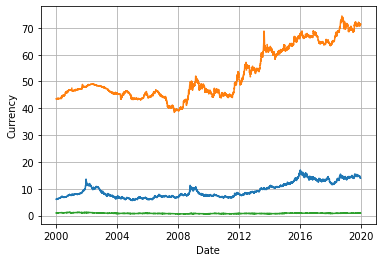

In [24]:
plt.plot(coi['Time Serie'], coi.ZAR, label = 'ZAR')
plt.plot(coi['Time Serie'], coi.INR, label = 'INR')
plt.plot(coi['Time Serie'], coi.GBP, label = 'GBP')
plt.xlabel('Date')
plt.ylabel('Currency')
plt.grid(True);